In [22]:
# Imports and setup
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Images directory (relative to this notebook's folder)
images_dir = Path('..') / 'images'
images_dir.mkdir(parents=True, exist_ok=True)
sns.set_theme(style='whitegrid')
%matplotlib inline

In [23]:
# Load dataset (parse Order Date if present)
df = pd.read_csv('../data/supersalesdata.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [24]:
# Basic checks and cleaning
df.info()
print('Missing values by column:')
print(df.isnull().sum())
print('\nDuplicate rows: ', df.duplicated().sum())
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [25]:
# Parse Order Date and extract Year/Month
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    df['Year'] = df['Order Date'].dt.year
    df['Month'] = df['Order Date'].dt.month
    print('Parsed Order Date, added Year and Month columns')
else:
    print('No Order Date column found in dataset')

Parsed Order Date, added Year and Month columns


# Dataset Overview
This notebook analyzes the Superstore sales dataset. The following cells show basic dataset information, summary statistics, and visualizations to help explore sales, profit, discounts, and seasonal patterns.

In [26]:
# Summary statistics
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
count,9800.000000,9800,3959,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000,3959.000000,3959.000000
unique,NaN,4922,NaN,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN,NaN,NaN
top,NaN,CA-2018-100111,NaN,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN
freq,NaN,14,NaN,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN,NaN,NaN
mean,4900.500000,NaN,2017-03-14 18:19:11.199798016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059,2016.728467,6.452892
min,1.000000,NaN,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,2015.000000,1.000000
25%,2450.750000,NaN,2016-04-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000,2016.000000,3.000000
50%,4900.500000,NaN,2017-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000,2017.000000,6.000000
75%,7350.250000,NaN,2018-03-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000,2018.000000,9.000000
max,9800.000000,NaN,2018-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,2018.000000,12.000000


## Sales by Region
Total sales aggregated by region (descending).

C:\Users\cusherah\AppData\Local\Temp\ipykernel_1972\2249100033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_region, x='Region', y='Sales', palette='Blues_d')


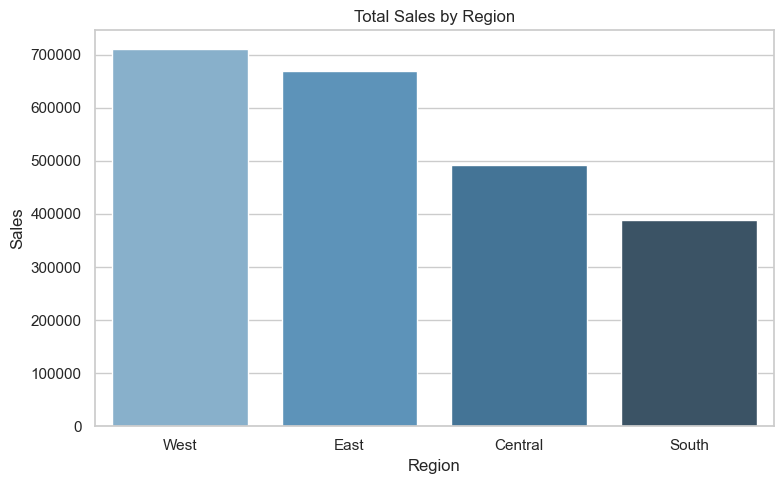

In [27]:
sales_region = df.groupby('Region', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=sales_region, x='Region', y='Sales', palette='Blues_d')
plt.title('Total Sales by Region')
plt.tight_layout()
plt.savefig(str(images_dir / 'sales_by_region.png'), dpi=150)
plt.show()

## Profit by Category
Total profit aggregated by product category.

C:\Users\cusherah\AppData\Local\Temp\ipykernel_1972\2573117257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_cat, x='Category', y='Sales', palette='Greens_d')


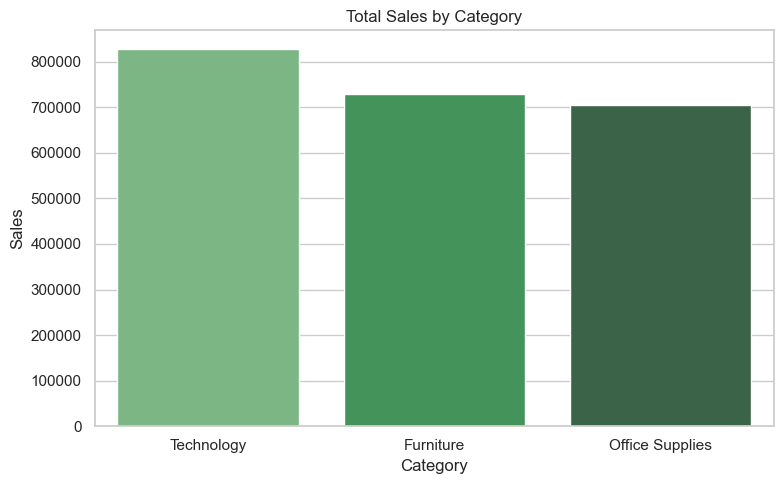

In [28]:
profit_cat = df.groupby('Category', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=profit_cat, x='Category', y='Sales', palette='Greens_d')
plt.title('Total Sales by Category')
plt.tight_layout()
plt.savefig(str(images_dir / 'sales_by_category.png'), dpi=150)
plt.show()

## Sales Distribution

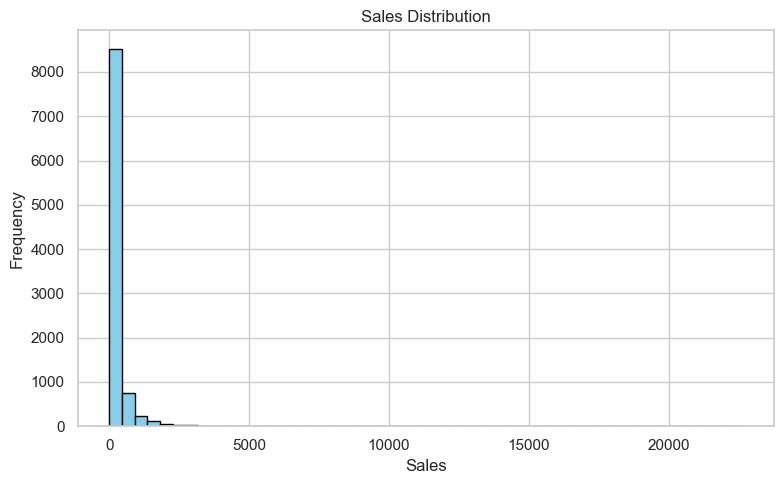

In [29]:
num_cols = ['Sales']
sales_dist = df[num_cols]
plt.figure(figsize=(8,5))
plt.hist(sales_dist['Sales'], bins=50, edgecolor='black', color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(str(images_dir / 'sales_distribution.png'), dpi=150)
plt.show()

## Top Sub-Categories by Sales


C:\Users\cusherah\AppData\Local\Temp\ipykernel_1972\1125826827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_sales, x='Sales', y='Sub-Category', palette='coolwarm')


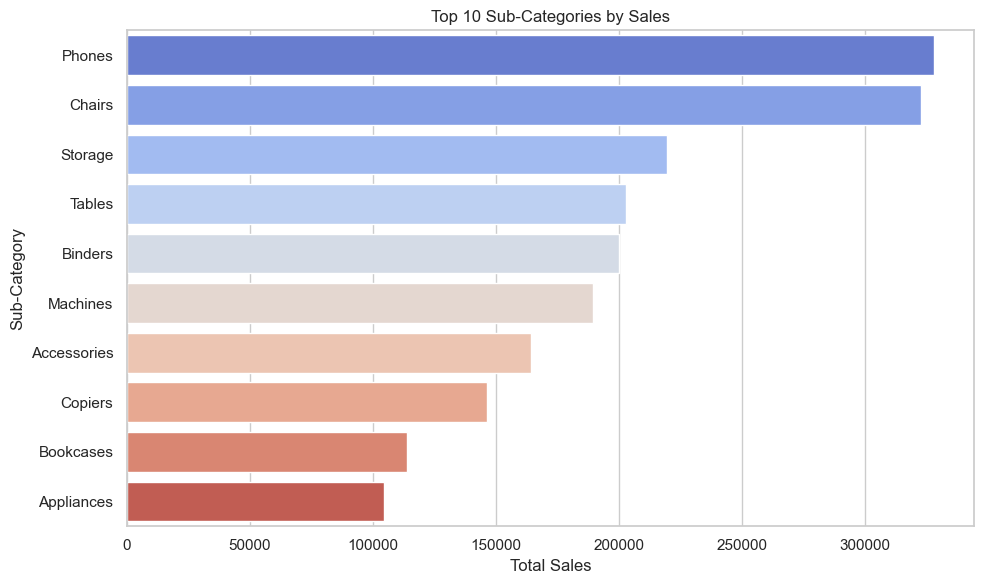

In [30]:
sub_category_sales = df.groupby('Sub-Category', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=sub_category_sales, x='Sales', y='Sub-Category', palette='coolwarm')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.savefig(str(images_dir / 'top_subcategories_sales.png'), dpi=150)
plt.show()

## Monthly Sales Trend

C:\Users\cusherah\AppData\Local\Temp\ipykernel_1972\1024821758.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


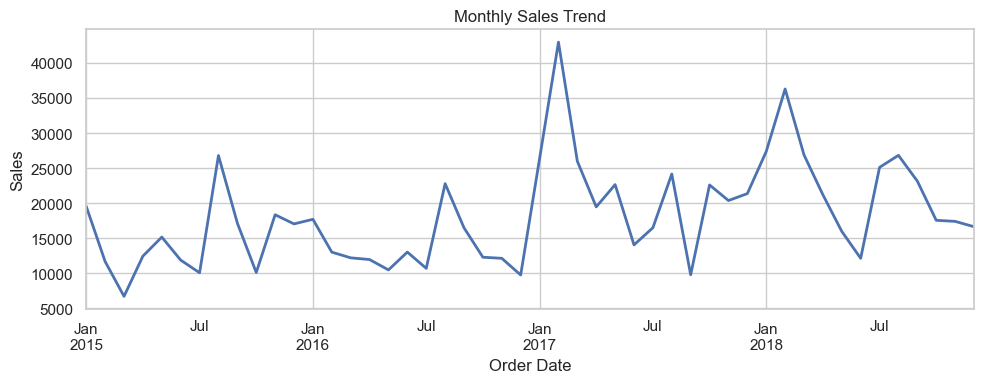

In [31]:
if 'Order Date' in df.columns and df['Order Date'].notna().any():
    monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()
    
    plt.figure(figsize=(10,4))
    monthly_sales.plot(linewidth=2)
    plt.title('Monthly Sales Trend')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.savefig(str(images_dir / 'monthly_sales_trend.png'), dpi=200)
    plt.show()